# Import libraries

In [2]:
%reload_ext autoreload
%autoreload 2
import os
import csv
import numpy as np
import function as func
import datetime
import matplotlib.pyplot as plt
# set colorful lines
cmap = plt.get_cmap('jet')
plt.rcParams['font.size'] = 18
np.set_printoptions(threshold=20)

# Setting

In [3]:
outdir = './output/SGtest_20230316'
if not os.path.isdir(outdir):
    os.makedirs(outdir)
    pass

In [7]:
doRebin = True # Rebinning in dat_to_array
rebinmethod = 0 # consider bin edges
binwidth = 300
nAve = 10

#indir = '../../data/2023-03-16/data'
indir = '/data/ms2840a/2023-03-16/data'
file_list1 = [
    f'{indir}/SG10GHz_-10dBm.dat',
    f'{indir}/SG10GHz_-10dBm_DarkBox1.dat',
    f'{indir}/SG10GHz_-10dBm_DarkBox2.dat',
    f'{indir}/SG10GHz_-10dBm_DarkBox3.dat',
]
label_list1 = ['Open', 'Close(flont)', 'Close(bottom)', 'Close(side-45deg)']

file_list2 = [
    f'{indir}/SG15GHz_-10dBm.dat',
    f'{indir}/SG15GHz_-10dBm_DarkBox1.dat',
    f'{indir}/SG15GHz_-10dBm_DarkBox2.dat',
    f'{indir}/SG15GHz_-10dBm_DarkBox3.dat',
]
label_list2 = ['Open', 'Close(flont)', 'Close(bottom)', 'Close(side-45deg)']

markers = ['o', 'x', '^', '+', 's', 'D', 'v', '>', '<']

rbw = 300
binary = False
nfile1 = len(file_list1)
nfile2 = len(file_list2)

# Read data

In [8]:
cutEdges = True
data_list1 = []
data_list2 = []

for file in file_list1:
    data_list1.append(
        func.dat_to_array(file, rbw=rbw, binary=binary, 
                          doRebin=doRebin, rebinmethod=rebinmethod, binwidth=binwidth, 
                          returnDict=True)
    )
    pass

for file in file_list2:
    data_list2.append(
        func.dat_to_array(file, rbw=rbw, binary=binary, 
                          doRebin=doRebin, rebinmethod=rebinmethod, binwidth=binwidth, 
                          returnDict=True)
    )
    pass

## Averaging data

In [9]:
for i, _data in enumerate(data_list1):
    data_list1[i]['freq_ave'], tmp = func.average_list(_data['freq'], nAve)
    data_list1[i]['W_ave'], data_list1[i]['W_ave_err'] = func.average_list(_data['W'], nAve)
    pass
    
for i, _data in enumerate(data_list2):
    data_list2[i]['freq_ave'], tmp = func.average_list(_data['freq'], nAve)
    data_list2[i]['W_ave'], data_list2[i]['W_ave_err'] = func.average_list(_data['W'], nAve)
    pass

In [10]:
_data = data_list1[0]
func.print_list(_data['freq'])
func.print_list(_data['freq_ave'])
func.print_list(_data['W'])
func.print_list(_data['W_ave'])

 (size=(3334,)) = [9.99950015e+09 9.99950045e+09 9.99950075e+09 ... 1.00004994e+10
 1.00004998e+10 1.00005000e+10]
 (size=(333,)) = [9.99950150e+09 9.99950450e+09 9.99950750e+09 ... 1.00004915e+10
 1.00004945e+10 1.00004975e+10]
 (size=(3334,)) = [2.39114136e-12 7.82040870e-12 6.63935528e-12 ... 2.09299465e-13
 8.62320168e-13 1.86782494e-12]
 (size=(333,)) = [2.13296024e-12 1.20196975e-12 9.99907468e-13 ... 2.83496112e-12
 1.34876428e-12 1.84698407e-12]


# Plot

In [11]:
def plot(data_list, label_list=None, title='10 GHz', freqkey='freq', powerkey='W'):
    if label_list is None:
        label_list = ['' for _data in data_list]
        pass
    
    plt.rcParams["font.size"] = 16
    fig, axes = plt.subplots(2,1,figsize=(12,8), squeeze=False, sharex=True)
    s = 20

    fig.suptitle(title, fontsize=24)
    for i, _data in enumerate(data_list):
        ax = axes[0][0]
        ax.scatter(_data[freqkey]*1e-6, func.W_to_dBm(_data[powerkey]), 
                   label=label_list[i], s=s, marker=markers[i])
        ax.set_ylabel('Power [dBm]')
        ax.legend(frameon=False)
        ax.grid(True)
  
        ax = axes[1][0]
        _y = func.ratio_to_dB(_data[powerkey]/data_list[0][powerkey])
        ax.scatter(_data[freqkey]*1e-6, _y, 
                   label=f'{label_list[i]}/{label_list[0]} (min={min(_y):.1f} dB)', s=s, marker=markers[i])
        #ax.set_yscale('log')
        ax.set_ylabel('Ratio [dB]')
        ax.set_xlabel('Frequency [MHz]')
        ax.legend(frameon=False)
        ax.grid(True)
        pass
    fig.tight_layout()
    
    return fig

## Plot raw data (RBW= {{binwidth}} Hz)

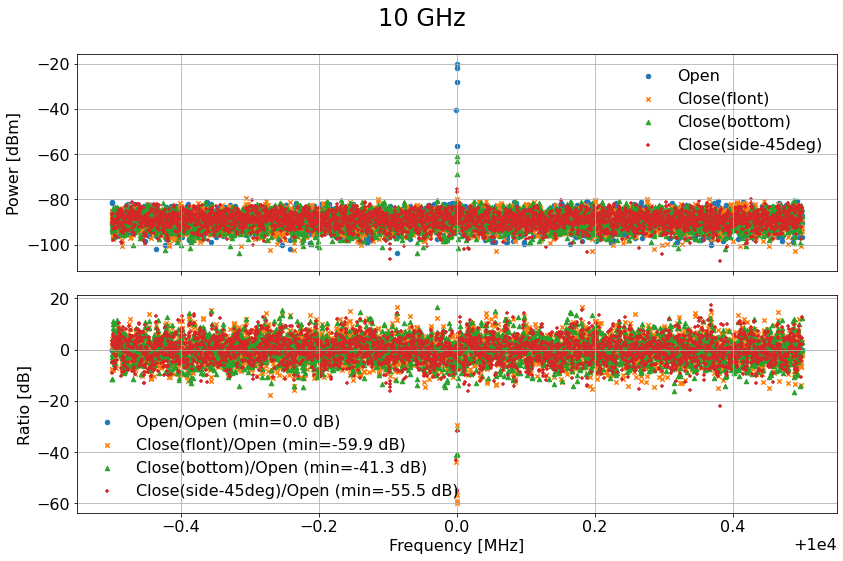

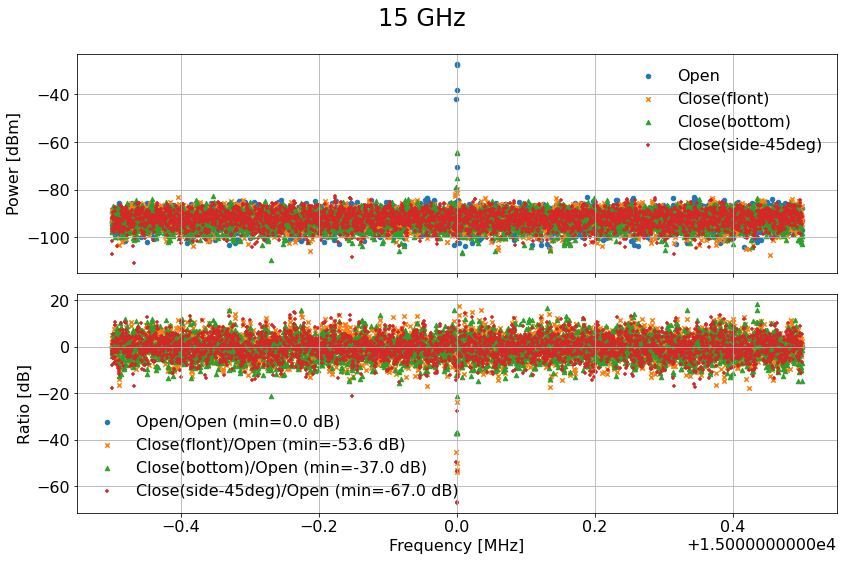

In [12]:
fig = plot(data_list1, label_list=label_list1, title='10 GHz', freqkey='freq', powerkey='W')
fig.savefig(f'{outdir}/SG10GHz_compare_RBW{binwidth:.0f}Hz.png')
fig = plot(data_list2, label_list=label_list2, title='15 GHz', freqkey='freq', powerkey='W')
fig.savefig(f'{outdir}/SG15GHz_compare_RBW{binwidth:.0f}Hz.png')

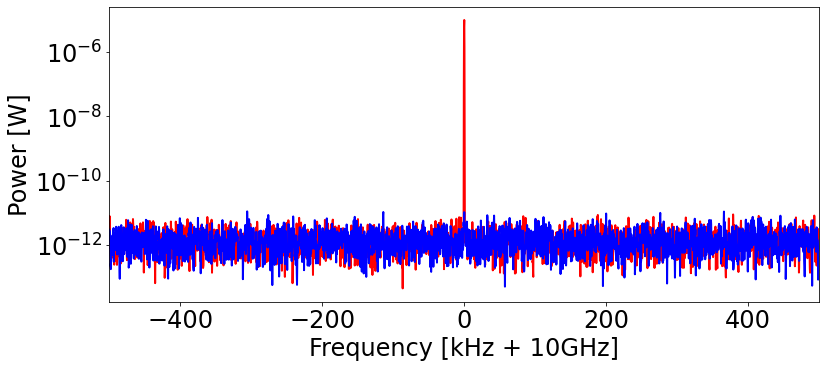

In [28]:
### Plot only front
plt.rcParams["font.size"] = 24
fig, axes = plt.subplots(1,1,figsize=(12,6), squeeze=False, sharex=True)

fig.suptitle('', fontsize=24)
ax = axes[0][0]
n = 0
_data = data_list1[n]
ax.plot( (_data['freq']-10e+9)*1e-3, _data['W'], label=label_list1[n], ls='-', lw=2, c='red')
n = 1
_data = data_list1[n]
ax.plot( (_data['freq']-10e+9)*1e-3, _data['W'], label=label_list1[n], ls='-', lw=2, c='blue')
ax.set_ylabel('Power [W]')
ax.set_xlabel('Frequency [kHz + 10GHz]')
ax.set_yscale('log')
ax.set_xlim([-500, 500])
#ax.legend(frameon=False)
#ax.grid(True)

fig.tight_layout()
fig.savefig(f'{outdir}/SG10GHz_compare_RBW{binwidth:.0f}Hz_open-close.png')

## Averaging after read_data (# of averaging points = {{nAve}} )

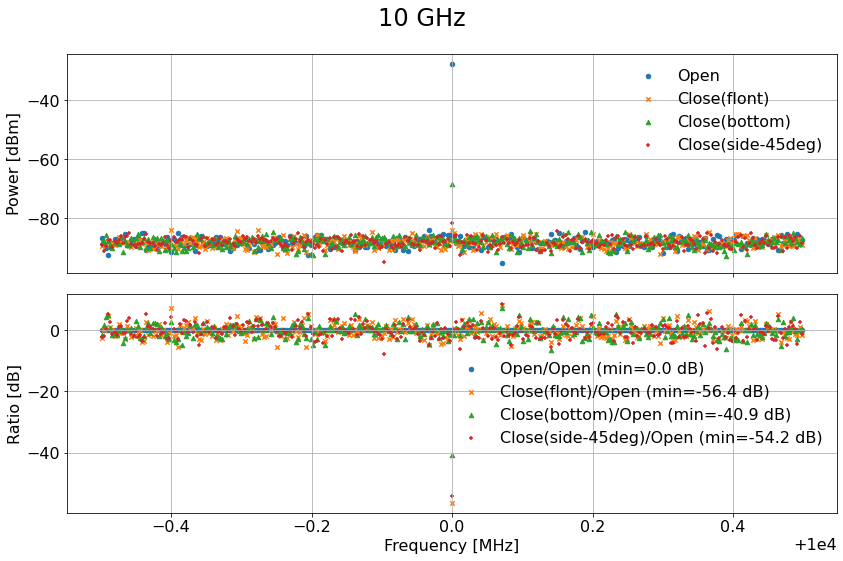

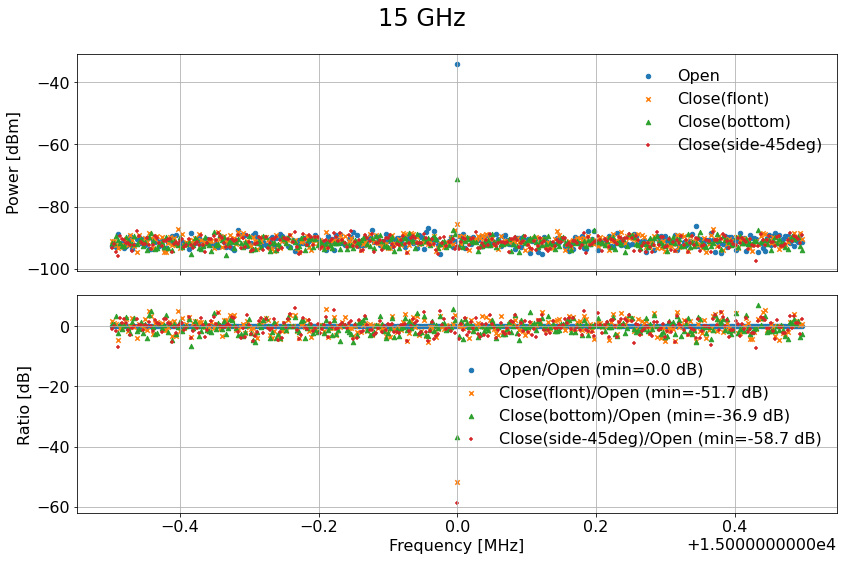

In [18]:
fig = plot(data_list1, label_list=label_list1, title='10 GHz', freqkey='freq_ave', powerkey='W_ave')
fig.savefig(f'{outdir}/SG10GHz_compare_RBW{binwidth:.0f}Hz_average.png')
fig = plot(data_list2, label_list=label_list2, title='15 GHz', freqkey='freq_ave', powerkey='W_ave')
fig.savefig(f'{outdir}/SG15GHz_compare_RBW{binwidth:.0f}Hz_average.png')